In [67]:
import matplotlib.pyplot as plt
import numpy as np

import ehrapy as ep

In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
current_notebook_dir = %pwd

_TEST_IMAGE_PATH = f"{current_notebook_dir}/../plot/_images"

In [70]:
adata_full = ep.dt.mimic_2(columns_obs_only=["service_unit", "day_icu_intime"])
adata_full = adata_full[~np.isnan(adata_full.X).any(axis=1)].copy()
adata = adata_full[:200, :].copy()
del adata_full
adata = ep.pp.encode(adata, autodetect=True)

! Features 'aline_flg', 'gender_num', 'service_num', 'day_icu_intime_num', 'hour_icu_intime', 'hosp_exp_flg', 'icu_exp_flg', 'day_28_flg', 'censor_flg', 'sepsis_flg', 'chf_flg', 'afib_flg', 'renal_flg', 'liver_flg', 'copd_flg', 'cad_flg', 'stroke_flg', 'mal_flg', 'resp_flg' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.
! Detected no columns that need to be encoded. Leaving passed AnnData object unchanged.


In [71]:
ep.pp.pca(adata)
ep.pp.neighbors(adata)

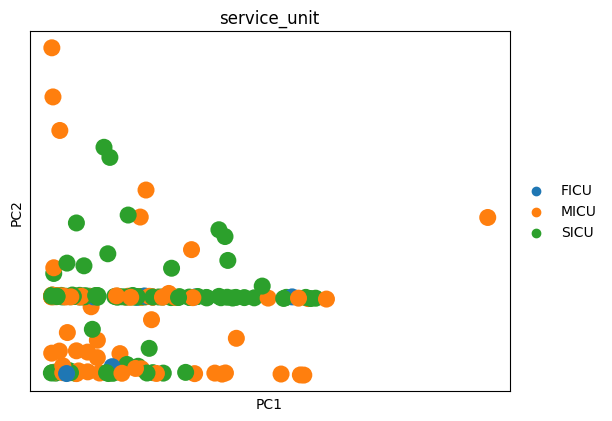

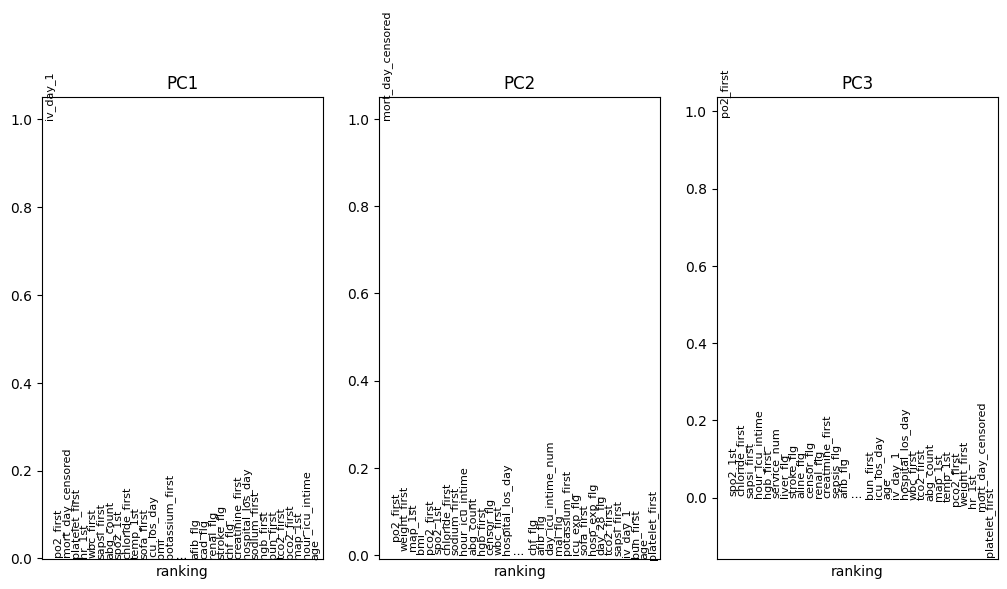

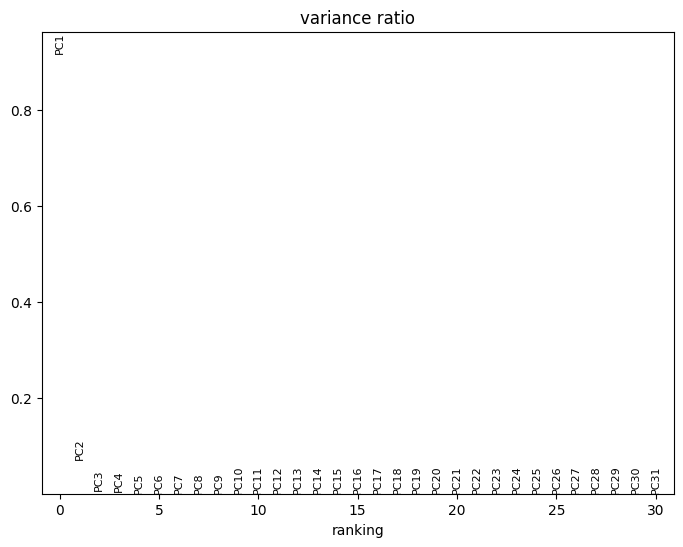

In [72]:
ep.pl.pca_overview(adata, components="1,2", color="service_unit", show=False)

for id, fignum in enumerate(plt.get_fignums(), start=1):
    fig = plt.figure(fignum)
    if fignum == 2:
        fig.set_size_inches(12, 6)
    else:
        fig.set_size_inches(8, 6)
    fig.subplots_adjust(left=0.2, right=0.8, bottom=0.2, top=0.8)

    fig.savefig(f"{_TEST_IMAGE_PATH}/pca_overview_{id}_expected.png", dpi=80)